In [65]:
import pandas as pd
import numpy as np

In [23]:
%load_ext autoreload
%autoreload 2

In [2]:
url='https://en.wikipedia.org/wiki/Geologic_time_scale'

In [4]:
tables=pd.read_html(url)

In [5]:
print(len(tables))

23


In [9]:
tables[3].head()

,Name,Time Span,Etymology of name
0,Quaternary,2.6 to 0 million years ago,First introduced by Jules Desnoyers in 1829 fo...
1,Neogene,23 to 2.6 million years ago,Derived from the Greek words νέος (néos) meani...
2,Paleogene,66 to 23 million years ago,Derived from the Greek words παλιός (palaiós) ...
3,Cretaceous,145 to 66 million years ago,Derived from Terrain Crétacé used in 1822 by J...
4,Jurassic,201.3 to 145 million years ago,Named after the Jura Mountains. Originally use...


In [8]:
ice='GISP2 dataset from Alley (2000)'
url='ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/greenland/summit/gisp2/isotopes/gisp2_temp_accum_alley2000.txt'

In [10]:
import downloader

In [11]:
dl=downloader.Downloader()

In [23]:
raw=dl.get(url, transforms='decode')

In [197]:
import download_temperature_data

In [198]:
dfs=download_temperature_data.get_temperature_datasets()

2022-07-16 21:24:47,962 INFO Downloader Read https://www.ncei.noaa.gov/pub/data/paleo/pages2k/EuroMed2k/eujja_2krecon_nested_cps.txt from cache at download_cache/eujja_2krecon_nested_cps.txt_efba084ace3a85f28bd8e6a5b05dde8c
2022-07-16 21:24:47,969 INFO Downloader Read https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_07.txt from cache at download_cache/regional_averages_tm_07.txt_c365c8673ea01764ad3a66cd85e9c2ea
2022-07-16 21:24:47,973 INFO Downloader Read https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_06.txt from cache at download_cache/regional_averages_tm_06.txt_7e4f61fb8f52aed8798f0ec17b1d7516
2022-07-16 21:24:47,979 INFO Downloader Read https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_08.txt from cache at download_cache/regional_averages_tm_08.txt_e10e019d2cb9d510a1b9e2ee02

In [199]:
dfs.keys()

dict_keys(['euromed2k', 'germany_july_meantemp', 'germany_june_meantemp', 'germany_august_meantemp', 'sunspots11000yrs'])

In [200]:
dfs['sunspots11000yrs']

,YearBP,SN,sigma
0,11405,37.4,20.7
1,11395,57.1,20.1
2,11385,89.0,32.1
3,11375,92.5,34.5
4,11365,75.2,29.9
...,...,...,...
1131,95,48.7,8.5
1132,85,55.0,12.7
1133,75,40.0,13.3
1134,65,27.0,9.4


In [82]:
em2k=dfs['euromed2k'].to_numpy()
gjmt6=dfs['germany_june_meantemp'].to_numpy()
gjmt7=dfs['germany_july_meantemp'].to_numpy()
gjmt8=dfs['germany_august_meantemp'].to_numpy()

In [83]:
dfnp[:,0]

array([-138., -137., -136., ..., 2001., 2002., 2003.])

In [88]:
gjmt=(gjmt6[:-1,:]+gjmt7+gjmt8)/3.0

In [89]:
np.mean(gjmt[:,2])

17.553569739952717

In [114]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [140]:
gjmean=np.mean(gjmt[:,2])

In [173]:
win=50
em2kmat=moving_average(em2k[:,1],2*win+1)
gjmtmat=moving_average(gjmt[:,2]-gjmean,2*win+1)

In [165]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]  # inch! :-/

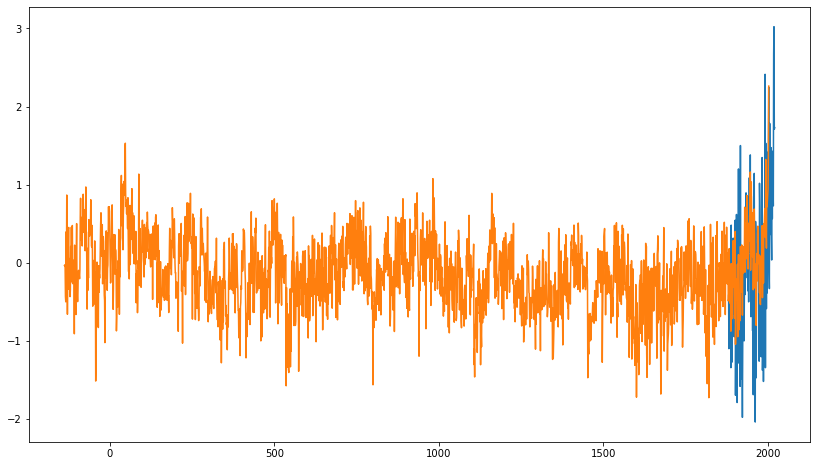

In [166]:
plt.plot(gjmt[:,0],gjmt[:,2]-gjmean)
plt.plot(dfnp[:,0],dfnp[:,1])

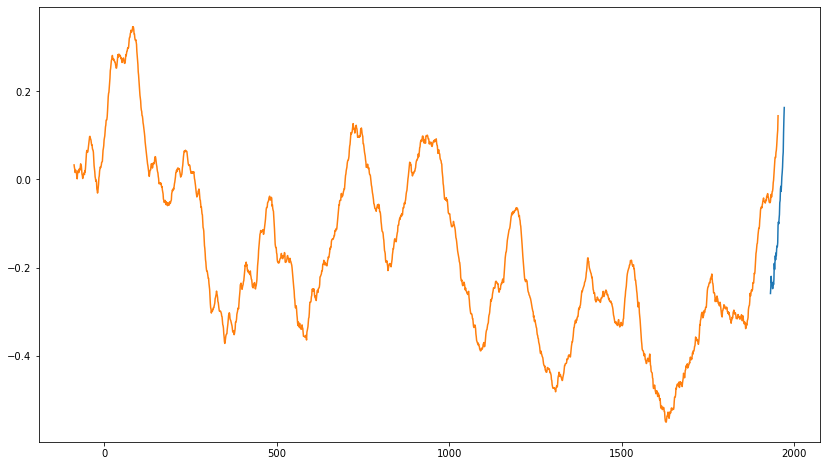

In [167]:
# plt.plot(dfnp[:,0],dfnp[:,1])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(dfnp[win:-win,0],em2kmat)

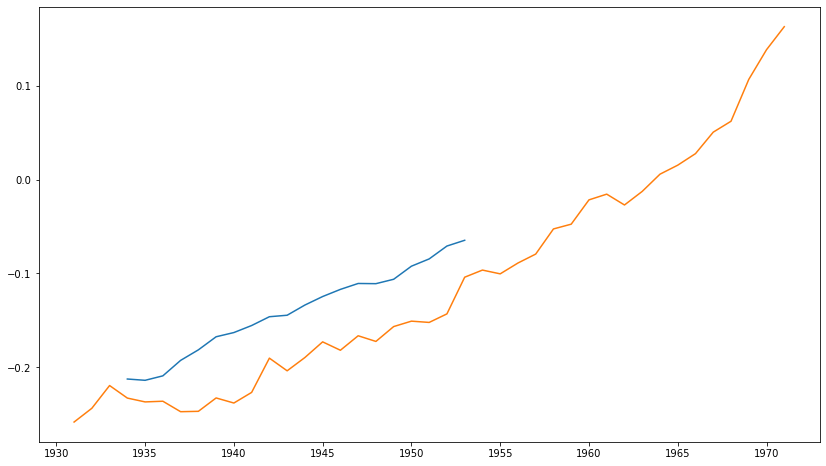

In [168]:
plt.plot(dfnp[-120+win:-win,0],em2kmat[-120+win:-win])
plt.plot(gjmt[win:-win,0],gjmtmat)

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

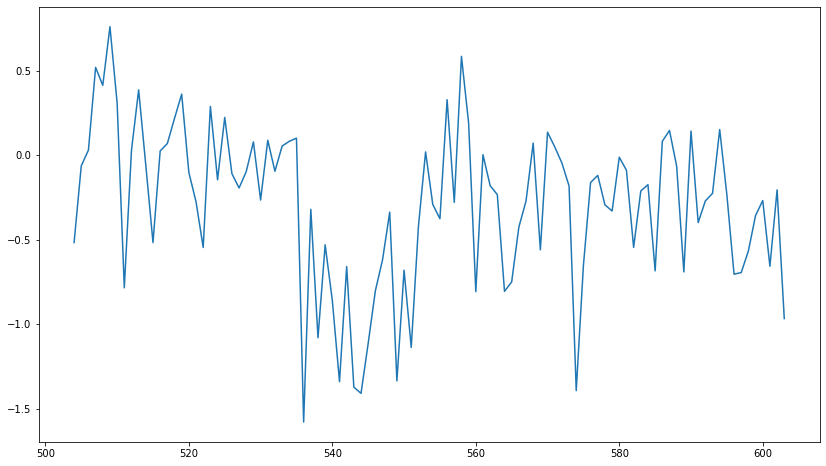

In [174]:
a=-1500
b=-1400
plt.plot(dfnp[a:b,0],dfnp[a:b,1])
plt.plot(dfnp[a:b,0],gjmtmat[a-win:b-win])


In [178]:
dl.get('https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwinpuzSjP74AhWCOuwKHeiOCrsQFnoECDIQAQ&url=ftp%3A%2F%2Fftp.ncdc.noaa.gov%2Fpub%2Fdata%2Fpaleo%2Fclimate_forcing%2Fsolar_variability%2Fsolanki2004-ssn.txt&usg=AOvVaw1tTDiUMZ93LQAYE4N8jt6A')

NameError: name 'dl' is not defined

In [180]:
import downloader

In [182]:
dl=downloader.Downloader()

In [192]:
tx=dl.get('https://www.ncei.noaa.gov/pub/data/paleo/climate_forcing/solar_variability/solanki2004-ssn.txt',transforms="decode")

2022-07-16 21:13:27,338 INFO Downloader Read https://www.ncei.noaa.gov/pub/data/paleo/climate_forcing/solar_variability/solanki2004-ssn.txt from cache at download_cache/solanki2004-ssn.txt_bb6f2191d85a1b60e1c6a32f9eeaa845


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 546: invalid start byte

In [191]:
tx

b'11,000 Year Sunspot Number Reconstruction\n---------------------------------------------------------------------\n                NOAA Paleoclimatology Program\n                               and\n         World Data Center for Paleoclimatology, Boulder\n---------------------------------------------------------------------\nNOTE: PLEASE CITE ORIGINAL REFERENCE WHEN USING THIS DATA!!!!!\n\n\nNAME OF DATA SET: 11,000 Year Sunspot Number Reconstruction\n\nLAST UPDATE: 2/2005 (Original Receipt by WDC Paleo)\nCONTRIBUTOR: Sami Solanki, Max-Planck-Institut f\xfcr Sonnensystemforschung\nIGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2005-015\n\n\nSUGGESTED DATA CITATION: Solanki, S.K., et al.  2005.\n11,000 Year Sunspot Number Reconstruction.\nIGBP PAGES/World Data Center for Paleoclimatology \nData Contribution Series #2005-015. \nNOAA/NGDC Paleoclimatology Program, Boulder CO, USA. \n\n\nORIGINAL REFERENCE: \nSolanki, S.K., I.G. Usoskin, B. Kromer, M. Sch\xfcssler and J. Beer.  2004.  \nAn u